#### Hyperparameter               ||            Typical Value (*Source:* Adapted from pg293 of Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron)
Input layer shape - Shape same as number of features (eg: 3 for #bedrooms, #bathrooms, #car spaces in housing price prediction)

Hidden layer(s) - Problem specific (minimum=1, maximum=unlimited)

Neurons per hidden layer - Problem specific (generally 10 to 100)

Output layer shape - Same shape as desired prediction shape (eg.: 1 for house price)

Hidden activation - Usually ReLU (rectified linear unit)

Output activation - None, ReLU, logistic/tanh

Loss function - MSE (mean square error) or MAE (mean absolute error)/Huber(combination of MAE/MSE) if outliers

Optimizer - SGD (stochastic gradient descent), Adam

*Source:* Adapted from pg293 of Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron 

# Introduction to Regression with Neural Network in TensorFlow

There are many definitions to a regression problem but in our case, we are going to simply it: by predicting a numerical variable based on some other combination of variables... ie. predicting a number

In [2]:
#import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


### Creating data to view and fit

In [3]:
import numpy as np
from matplotlib import pyplot as plt

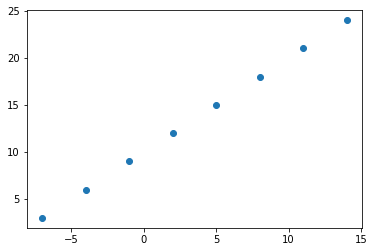

In [4]:
#create features (independent variable)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels (dependent variable)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,y)

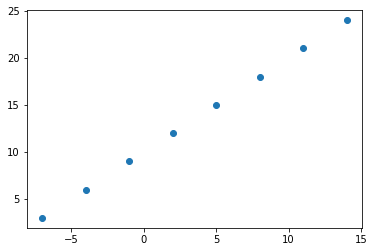

In [5]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
plt.scatter(X, y);

In [6]:
#relationship between our defined X and y
y == X+10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

### Input and Output shapes

In [7]:
#creating a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

## Steps in modelling with Tensorflow ##

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define loss function (the function which tells our model how much wrong it is) and optimizer (how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model - letting a model try to find patterns between X & y (features & labels)

In [8]:
#set random seed
tf.random.set_seed(42)

# 1. Creating a model using Sequential API
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # SGD - Stochastic Gradient Descent
                metrics=["mae"]
)

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
#Checking out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
#Trying to make a prediction with the model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving our model 

We can improve our model by altering the steps we took to create the model

1. Creating a model - here we might add more layers, increasing the number of hidden units (also called neurons) within each of the hidden layers, and we might change the activation function of each layer
2. Compiling a model - here we might change the optimization function of perhaps the *learning rate* of the optimization function.
3. Fitting a model - here we might fit a model for more epochs (leave it longer for training) or on more data (give the model more examples to learn from)

In [11]:
#rebuilding our model

# 1. Model creation
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)
# 2. Compiling model
model.compile(loss=tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.SGD(),
            metrics=["mae"])
# 3.Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 171ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3m

In [12]:
#our data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [14]:
#Trying to improve the model

#1. Creation of model (with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compiling model
model.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)

#3. Fitting the model
model.fit(X, y, epochs=100)

C:\Users\aruna\anaconda3\envs\tf2_gpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
1/1 [==============================] - 0s 246ms/step - loss: 12.0109 - mae: 12.0109
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0827 - mae: 11.0827
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1377 - mae: 10.1377
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.1686 - mae: 9.1686
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1666 - mae: 8.1666
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 7.1234 - mae: 7.1234
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.0478 - mae: 7.0478
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 7.4552 - mae: 7.4552
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.7956 - mae: 7.7956
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.8033 - mae: 7.8033
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss:

In [15]:
#initial data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
#prediction
model.predict([17.0])

array([[25.358276]], dtype=float32)

## Common ways to improve deep learning model

1. Adding layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the optimization function
5. Change the learning rate (most important hyper parameter)
6. Fitting on more data
7. Fitting for longer (increasing epochs)

## Evaluating a model

In practice, typical workflow while building a neural network:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation of model *visualization* is very important !

It's a good idea to visualize:
* The date - what data we are working with? What does it look like?
* The model itself  - what does our model look like?
* The training of a model - how does a model perform while it learns
* The predictions of the model - how do the predictions of the model line up against the ground truth (the original label)?

In [17]:
#making a bigger dataset
X = tf.range(-100, 100, 4)
#making labels for dataset
y = X + 10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

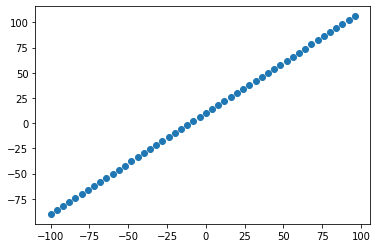

In [18]:
#Visualize the data
from matplotlib import pyplot as pyplot
plt.scatter(X, y);

### The3 3 sets ...

* **Training set** - the model learns from the data, typically 70-80% of total data available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this dataset to test what it has learned, this set is typically 10-15% of the total data available 

In [19]:
#Splitting data into training and testing data sets
X_train = X[:40] #first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] #last 10 are testing samples (20% of the data)
y_test = y[40:]

print("Original X: ", len(X))
print("Original y: ",len(y))
print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

Original X:  50
Original y:  50
X_train:  40
X_test:  10
y_train:  40
y_test:  10


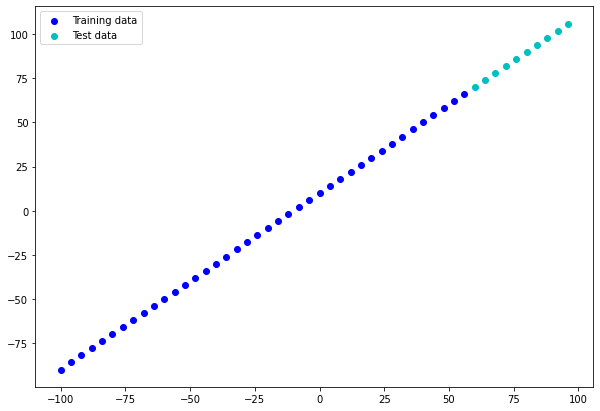

In [20]:
#Visualizing data
plt.figure(figsize=[10,7])
#plotting training data
plt.scatter(X_train, y_train, c='b', label="Training data")
#plotting test data
plt.scatter(X_test, y_test, c='c', label="Test data")
#show a legend
plt.legend();

In [21]:
#building a neural network on the new data

#1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics="mae")

#3. Fitting the model
#model.fit(X_train, y_train, epochs=100)

## Visualizing the model

In [22]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [23]:
#creating a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

#1. Creating a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="test_model_1")

#2. Compiling the model (same as above)
model.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])


In [24]:
model.summary()

Model: "test_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model that can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **Transfer learning**)

**Resources:** to have a in-depth overview of Trainable params, refere to MIT- Introduction to deep learning

**Excercise:** trying shuddling the number of hidden units in the dense layers to see as how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [25]:
#fitting model to training data
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 0s - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 - 0s - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 - 0s - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 - 0s - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 - 0s - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 - 0s - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 - 0s - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 - 0s - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 - 0s - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 - 0s - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 - 0s - loss: 10.2473 - mae: 10.2473
Epoch 12/100
2/2 - 0s - loss: 25.2803 - mae: 25.2803
Epoch 13/100
2/2 - 0s - loss: 16.9897 - mae: 16.9897
Epoch 14/100
2/2 - 0s - loss: 25.9217 - mae: 25.9217
Epoch 15/100
2/2 - 0s - loss: 17.9948 - mae: 17.9948
Epoch 16/100
2/2 - 0s - loss: 7.3510 - mae: 7.3510
Epoch 17/100
2/2 - 0s - loss: 10.8636 - mae: 10.8636
Epoch 18/100
2/2 - 0s - loss: 19.5304 - mae: 19.5304
Epoch 19/100
2/2 - 0s - loss: 10.3469 - mae: 10.3469
Epoc

In [26]:
#get a summary6 of the model
model.summary()

Model: "test_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


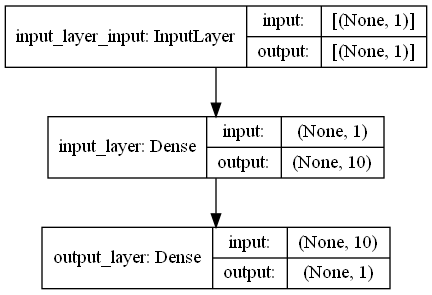

In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing model's predictions

To visualize the model's predictions, it's a good idea to plot them against the ground truth labels.
Often we will see this in the form of y_test or y_true versus y_pred (ground truth versus the model's predictions)

In [28]:
#making some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.552216],
       [ 75.13993 ],
       [ 79.72766 ],
       [ 84.315384],
       [ 88.90311 ],
       [ 93.490845],
       [ 98.07855 ],
       [102.66628 ],
       [107.25402 ],
       [111.841736]], dtype=float32)

In [29]:
#ground truth
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

**Note:** If you are feeling to reuse some kind of functionality in future, it's a good idea to turn it into a function.

In [30]:
#creating a plotting function
def plot_predictions(train_data,train_labels,test_data,test_labels,predictions):
    '''
    Plots training data, test data and compares predictions with the ground truth
    '''
    plt.figure(figsize=(10,7))
    #plotting training data in blue
    plt.scatter(train_data, train_labels, c='b', label="Training data")
    #plotting testing data in green
    plt.scatter(test_data, test_labels, c='g', label="Testing data")
    #plotting model's prediction in red
    plt.scatter(test_data, predictions, c='r', label="Predictions")
    #show legend
    plt.legend;

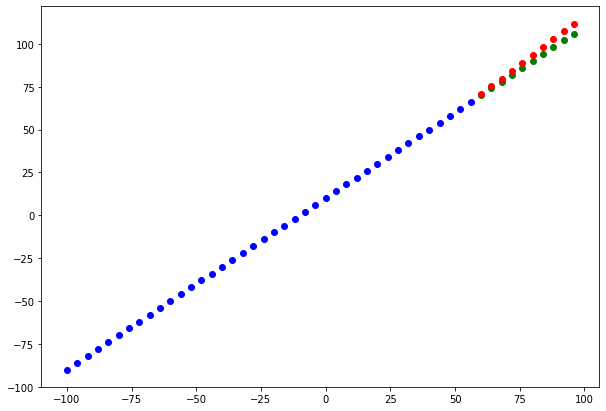

In [31]:
plot_predictions(train_data=X_train, test_data=X_test, train_labels=y_train, test_labels=y_test, predictions=y_pred)

### Evaluating the model's predictions with regression evaluation metrics

Depending on the problem, there will be different evaluation matrics to evaluate model's performance.
Since we are working on regression, two of the main metrics:
* MAE - mean absolute error (on average, how wrong is each of the model's predictions)
* MSE - mean square error (square the average errors)
* Huber - combination of MAE and MSE. Less sensitive to outliers than than MSE.

In [32]:
#Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 110ms/step - loss: 3.1970 - mae: 3.1970


[3.1969733238220215, 3.1969733238220215]

In [40]:
print(y_test)
y_pred = tf.squeeze(tf.constant(y_pred)) #Note: when comparing both the tensors they have to be object of same kind and also the shape has to be same
print(y_pred)

tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)
tf.Tensor(
[ 70.552216  75.13993   79.72766   84.315384  88.90311   93.490845
  98.07855  102.66628  107.25402  111.841736], shape=(10,), dtype=float32)


In [41]:
#calculating Mean Absolute Error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969733>

In [43]:
#calculating mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070361>

```
MSE is generally larger than MAE as it amplifies the erro (from the equation, its square of the error)

In [44]:
#making some functions for MAE and MSE
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for the model to train upon (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using more complex model) - this might come in the form of more layers or mode hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data